In [1]:

import numpy as np
from matplotlib import pyplot

import keras
from keras.utils import np_utils
from keras.datasets import mnist
# En caso de que no empleemos un dataset incluido por defecto en Keras: 
# from google.colab import drive
# drive.mount('/content/drive')
# https://stackoverflow.com/questions/59120853/google-colab-is-so-slow-while-reading-images-from-google-drive

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

#HIPERPARAMETROS A FIJAR
# TAMAÑO DE BATCH
batch_size = 128
# NÚMERO DE CLASES
num_classes = 10
# ÉPOCAS DE ENTRENAMIENTO: Numero de veces que iteramos sobre el conjunto de datos de entrenamiento enteros
epochs = 20

# DIMENSIONES DE ENTRADA DE LAS IMAGENES
img_rows, img_cols = 28, 28

# CARGAMOS LOS DATOS DE ENTRENAMIENTO Y TEST: x-> Imagenes, y-> Etiquetas
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# FORMATEAMOS Y NORMALIZAMOS LOS DATOS (hacemos que los datos tengan media 0 y desviacion tipica 1, para ayudar en la optimizacion)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Transformamos los vectores de clases en matrices.
# Cada componente se convierte en un vector de ceros
# con un uno en la componente correspondiente a la
# clase a la que pertenece la imagen. Este paso es
# necesario para la clasificación multiclase en keras.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)



11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


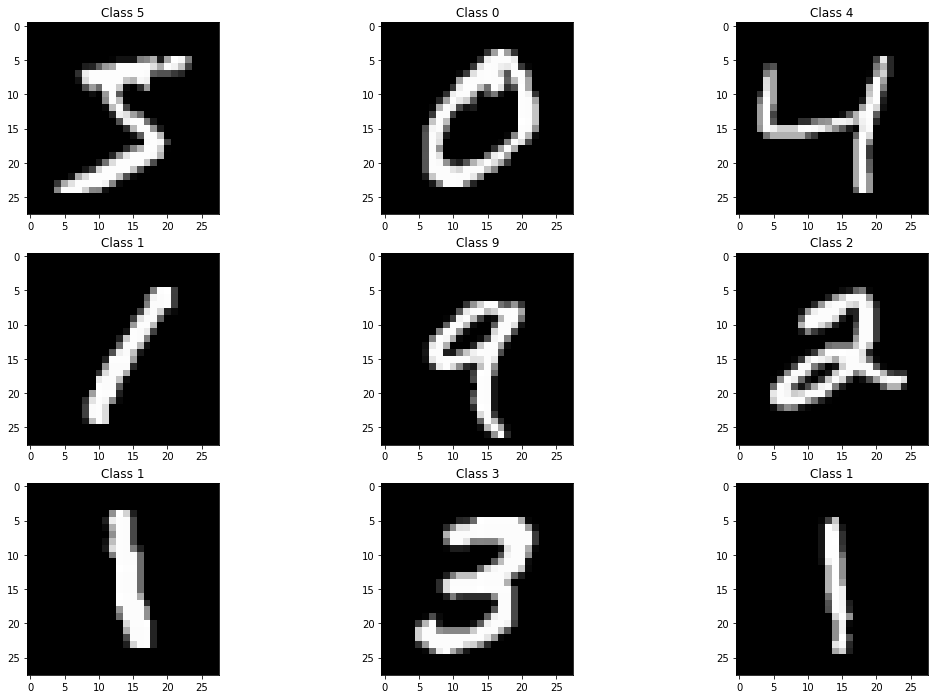

In [2]:
#VISUALIZAMOS ALGUNAS DE LAS IMÁGENES DEL DATASET
number_images_per_row = 3
result = np.where(y_train == 1)
fig = pyplot.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {}'.format(result[1][i])
  pyplot.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  pyplot.imshow(x_train[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)
pyplot.show()



In [3]:
# AQUI COMIENZA LA DESCRIPCION DEL MODELO DE RED NEURONAL QUE VAMOS A EMPLEAR
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# AQUI ACABA LA DESCRIPCION DEL MODELO

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [4]:
# AQUI DEFINIMOS EL OPTIMIZADOR, LA FUNCION DE PERDIDA, Y LA METRICA
import tensorflow as tf
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [5]:
#ENTRENAMOS: https://keras.io/api/models/model_training_apis/
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.1)

# HAY QUE ACORDARSE DE ACELERAR LA EJECUCION POR MEDIO DE: Editar - Configuración del Cuaderno - Acelerador por Hardware - GPU 

# A la hora de entrenar los modelos, la función "fit" va a actualizar continuamente los pesos, de modo que si la llamáis 
# varias veces con el mismo modelo actualizará progresivamente los pesos cada vez 
# (es decir, entrenará incrementalmente el modelo a partir de los pesos encontrados en el anterior entrenamiento). 
# Si no nos interesa este comportamiento, siempre podemos recurrir a weights = model.get_weights() y model.set_weights(weights).


Epoch 1/20
422/422 [==============================] - 20s 17ms/step - loss: 2.2865 - accuracy: 0.1583 - val_loss: 2.2440 - val_accuracy: 0.3572
Epoch 2/20
422/422 [==============================] - 7s 16ms/step - loss: 2.2220 - accuracy: 0.2580 - val_loss: 2.1660 - val_accuracy: 0.4883
Epoch 3/20
422/422 [==============================] - 7s 16ms/step - loss: 2.1458 - accuracy: 0.3497 - val_loss: 2.0673 - val_accuracy: 0.5622
Epoch 4/20
422/422 [==============================] - 7s 15ms/step - loss: 2.0498 - accuracy: 0.4205 - val_loss: 1.9418 - val_accuracy: 0.6130
Epoch 5/20
422/422 [==============================] - 7s 15ms/step - loss: 1.9288 - accuracy: 0.4765 - val_loss: 1.7870 - val_accuracy: 0.6530
Epoch 6/20
422/422 [==============================] - 7s 16ms/step - loss: 1.7871 - accuracy: 0.5236 - val_loss: 1.6131 - val_accuracy: 0.6948
Epoch 7/20
422/422 [==============================] - 7s 15ms/step - loss: 1.6421 - accuracy: 0.5576 - val_loss: 1.4347 - val_accuracy: 0.734

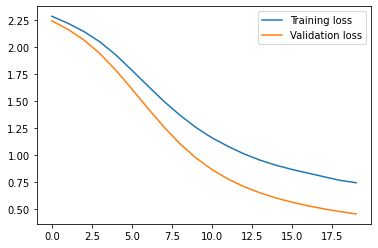

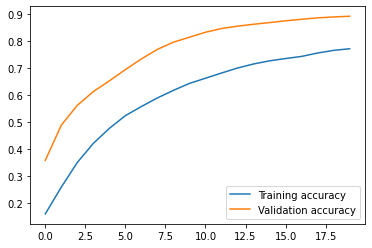

In [9]:
# Esta función pinta dos gráficas, una con la evolución
# de la función de pérdida en el conjunto de train y
# en el de validación, y otra con la evolución de la
# accuracy en el conjunto de train y el de validación.
# Es necesario pasarle como parámetro el historial del
# entrenamiento del modelo (lo que devuelven las
# funciones fit() y fit_generator()).
def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    pyplot.plot(loss)
    pyplot.plot(val_loss)
    pyplot.legend(['Training loss', 'Validation loss'])
    pyplot.show()
    
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    pyplot.plot(acc)
    pyplot.plot(val_acc)
    pyplot.legend(['Training accuracy','Validation accuracy'])
    pyplot.show()


mostrarEvolucion(hist)

In [10]:
# APLICAMOS EL TEST
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5034284591674805
Test accuracy: 0.8762999773025513


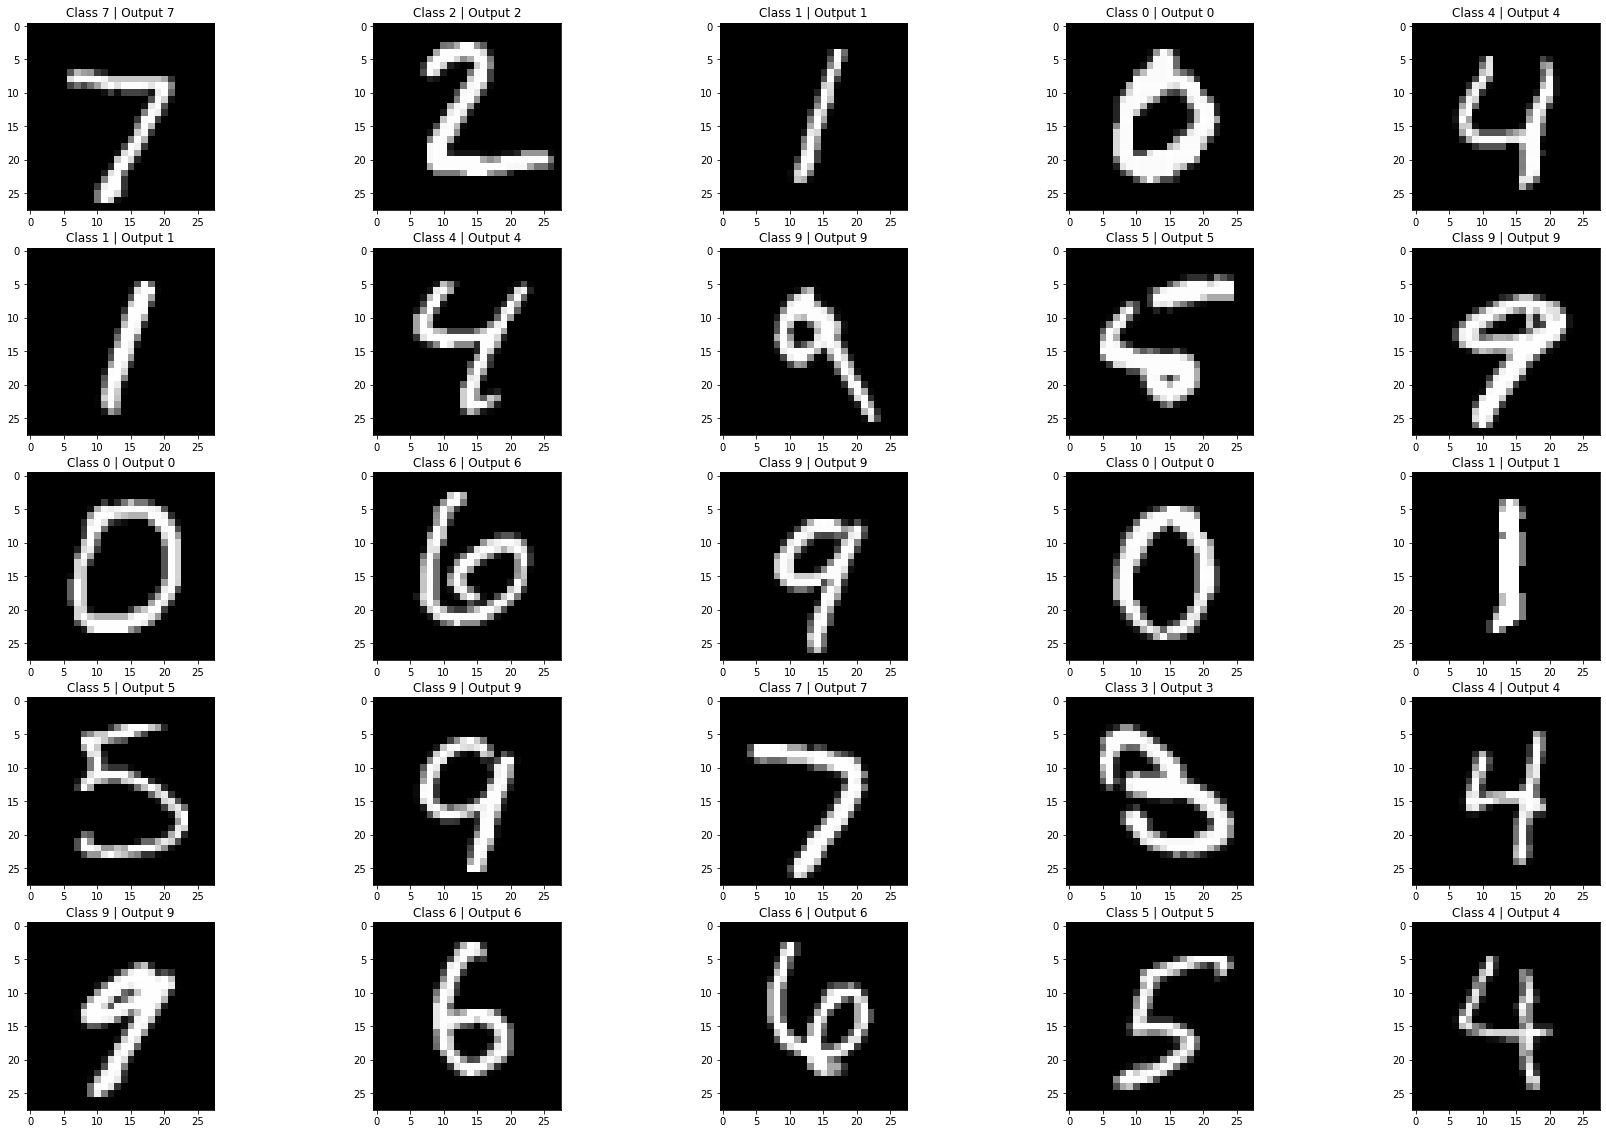

In [8]:
# VAMOS A VER CÓMO CLASIFICA ALGUNOS EJEMPLOS CONCRETOS
y_prob = model.predict(x_test) 
y_classes = np.argmax(y_prob,axis=1) #O y_prob.argmax(axis=-1)

number_images_per_row = 5
result = np.where(y_test == 1)
fig = pyplot.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {} | Output {}'.format(result[1][i],y_classes[i])
  pyplot.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  pyplot.imshow(x_test[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)
pyplot.show()